In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
import matplotlib.pyplot as plt

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)
''' 
    network          : [top] <---> [pen] ---> [hid] ---> [vis] 
                               `-> [lbl] 
    lbl : label
    top : top
    pen : penultimate
    hid : hidden
    vis : visible
'''
"""
Args:
  sizes: Dictionary of layer names and dimensions
  image_size: Image dimension of data
  n_labels: Number of label categories
  batch_size: Size of mini-batch
"""
lbl=10
top=2000
pen=500
hid=500
vis=28*28
sizes={"lbl":lbl,"top":top,"pen":pen,"hid":hid,"vis":vis}
batch_size = 10
n_labels = lbl

In [3]:
#crete a DBN

dbn = DeepBeliefNet(sizes=sizes,image_size=image_size,n_labels=n_labels,batch_size=batch_size)


In [4]:
#train the dbn

n_iterations = 30
dbn.train_greedylayerwise(vis_trainset=train_imgs,lbl_trainset=train_lbls,n_iterations=n_iterations)

training vis--hid
learning CD1
iteration=      0 recon_loss=42.3601
iteration=      1 recon_loss=36.4170
iteration=      2 recon_loss=33.9771
iteration=      3 recon_loss=32.7026
iteration=      4 recon_loss=32.0468
iteration=      5 recon_loss=31.4834
iteration=      6 recon_loss=31.1567
iteration=      7 recon_loss=30.9377
iteration=      8 recon_loss=30.8481
iteration=      9 recon_loss=30.6131
iteration=     10 recon_loss=30.4346
iteration=     11 recon_loss=30.3441
iteration=     12 recon_loss=30.3311
iteration=     13 recon_loss=30.2067
iteration=     14 recon_loss=30.2025
iteration=     15 recon_loss=30.1545
iteration=     16 recon_loss=30.0878
iteration=     17 recon_loss=29.9870
iteration=     18 recon_loss=30.0566
iteration=     19 recon_loss=30.0962
iteration=     20 recon_loss=30.0769
iteration=     21 recon_loss=29.9802
iteration=     22 recon_loss=30.0681
iteration=     23 recon_loss=29.9403
iteration=     24 recon_loss=30.0371
iteration=     25 recon_loss=29.9737
iterati

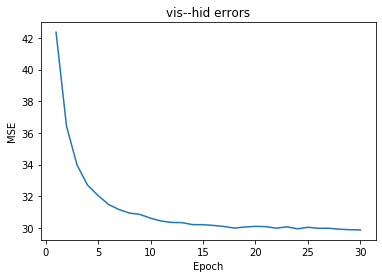

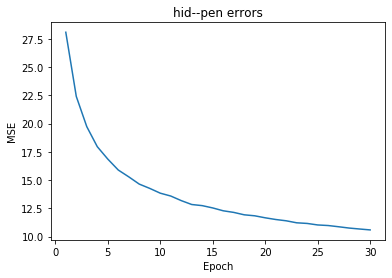

In [5]:
#show the errors of first two RBMs
x=[i+1 for i in range(n_iterations)]
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,dbn.vis_hid_errors)
plt.title("vis--hid errors")
plt.savefig("vis_hid_errors.png")
plt.show()
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,dbn.hid_pen_errors)
plt.title("hid--pen errors")
plt.savefig("hid_pen_errors.png")
plt.show()

In [6]:
dbn.recognize(test_imgs,test_lbls)

drive the network bottom to top
vis--hid
hid--pen
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
accuracy = 84.85%


In [7]:
dbn.recognize(train_imgs,train_lbls)

drive the network bottom to top
vis--hid
hid--pen
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
accuracy = 84.41%


In [8]:
lbls = dbn.label_log
print(lbls)

[array([[3.22873863e-07, 1.13449338e-08, 2.97543988e-06, ...,
        9.97264117e-01, 4.67892615e-08, 7.50646886e-05],
       [3.35116426e-04, 1.67720278e-01, 8.07220332e-01, ...,
        9.98849367e-01, 7.10152104e-03, 2.47942946e-01],
       [7.88131315e-07, 9.99867690e-01, 3.59221404e-05, ...,
        9.99973087e-01, 4.06851132e-04, 2.92891630e-04],
       ...,
       [1.59025955e-04, 2.68301793e-05, 1.00371477e-05, ...,
        9.99271854e-01, 4.89298576e-05, 1.06191217e-01],
       [2.49369825e-04, 1.89187327e-05, 2.32243538e-06, ...,
        9.99999599e-01, 2.73014468e-06, 9.13943005e-01],
       [4.86944717e-04, 4.55265723e-04, 2.35360759e-03, ...,
        9.99983008e-01, 7.23211734e-01, 7.60991591e-04]]), array([[1.30789272e-07, 5.39634157e-08, 4.92249499e-05, ...,
        9.86070963e-01, 1.27713406e-07, 3.25845789e-05],
       [4.39335686e-04, 2.95220461e-01, 2.78773764e-01, ...,
        9.99943436e-01, 1.17142241e-01, 2.66562576e-01],
       [5.97966409e-07, 9.99701229e-01, 6

From the top RBM, drive the network
generate mp4s/dbn.generate0.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate2.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate3.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate4.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate5.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate6.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate7.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate8.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate9.mp4


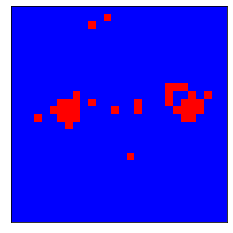

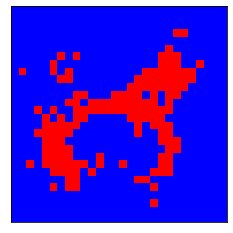

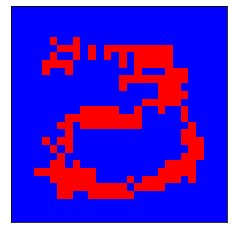

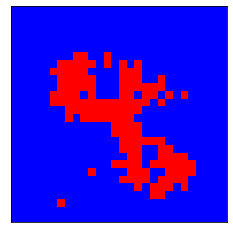

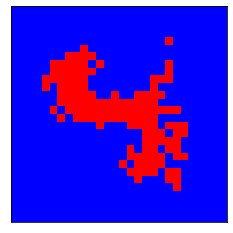

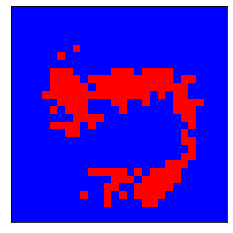

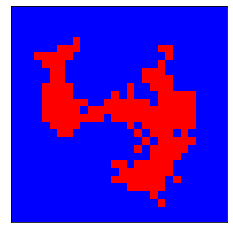

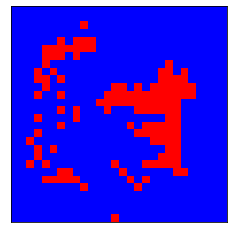

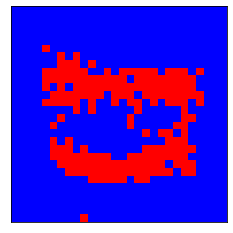

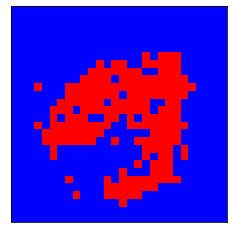

In [11]:
for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="dbn")